# Project 1: SAT & ACT Analysis

## Problem Statement

We will look at the participation rates of ACT and SAT for each state in the United States. If the overall participation rates of the ACT is higher than SAT, we will try to find a possible cause and decide on future directions and plans to improve the participation rates of SAT. For states that have low participation rates for SAT, we will need to gather feedback from the schools why they are not administering the SAT.

## Executive Summary

It is found that Iowa, Mississippi and North Dakota have the lowest participation rate for SAT in 2017 and 2018. The participation rate of ACT is higher than that of SAT in 2017 and 2018. In our dataset, for both SAT and ACT, when participation rate is low, the score is high. When participation rate is high, the score is low. This is likely due to States that have low SAT/ACT participation rates have the tendency or practice to send their best students to take SAT/ACT and have the highest scores.

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Further Research](#Further-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Import Libraries

In [1]:
# Numpy Library
import numpy as np

# from matplotlib import pyplot to plot graphs
import matplotlib.pyplot as plt

# Seaborn visualization library; based on matplotlib
import seaborn as sns

# from scipy library, import stats function to do statistical functions
import scipy.stats as stats

# Python Data Analysis Library
import pandas as pd

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to pandas dataframes.

In [2]:
#assign variable names to .csv files
sat_17_data = '../data/sat_2017.csv'
act_17_data = '../data/act_2017.csv'

#sat17 dataframe
sat17 = pd.read_csv(sat_17_data)

#act17 dataframe
act17 = pd.read_csv(act_17_data)


#### 2. Display Data

Print the first 10 rows of each dataframe.

In [3]:
# sat17 10 rows of dataframe
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
# act17 10 rows of dataframe
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Describe Data

**In the sat_2017 database:**
* **Participation** is the percentage of students in the State that took part in the SAT examination.
* **Evidence-Based Reading and Writing** is the mean Evidence-Based Reading and Writing SAT score for each State.
* **Math** is the mean Math SAT score for for each State.
* **Total** is the Total SAT score for Evidence-Based Reading and Writing and Math.
* The range of scores for each subject is from 400 to 800. Hence the total score can range from 800 to 1600.
* For each row, it shows the participation rate and average SAT score for each state in the United States.

**For definition of SAT score, please refer to footnotes at the end of the notebook**

**In the act_2017 database:**
* **Participation** is the percentage of students in the State that took part in the ACT examination.
* **English** is the mean English ACT score for each State.
* **Math** is the mean Math ACT score for for each State.
* **Reading** is the mean Reading ACT score for each State.
* **Science** is the mean Science ACT score for each State.
* **Composite** is the mean Composite ACT score for each State. It is obtained by adding English, Math, Reading, Science together and divided by 4.
* The range of scores for each subject is from 1 to 36.
* For each row, it shows the participation rate and average ACT score for each state in the United States.
* For the row with National, it shows the National participation rate and ACT score.

**For definition of ACT score, please refer to footnotes at the end of the notebook**

**National score is not present inside SAT data.**


#### 4a. Data completeness 

The database is incomplete for sat_2017 database, as it does not have the the national participation rate, national average score for Evidence-Based Reading and Writing and Math, total of the national average score of ERW and Math.

* From the website https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/;
  The national average score for ERW is stated as 533, national average score for Math is stated as 527, the total for ERW   and Math is stated as 1060. The national participation rate is stated as non-applicable and the total number of students   that were tested is stated as 1,715,481.


Whereas the act_2017 database has the national score.

The national average is important as it helps to give educators and students a yardstick on their standing to secure admission to a college in the USA.

#### 4b. Issues with the observations

Let's compare questionable values in the data files to the source of the data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
sat17[sat17['State'].isin(['Maryland'])]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


* In the SAT data, the Math score of Maryland is 52.
* The score possible for each subject is 400 to 800.
* With reference to the source of data, Math score for Maryland should be 524.

In [6]:
act17[act17['State'].isin(['Maryland', 'Wyoming'])]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


* In the ACT data, the Science score of Maryland is 2.3.
* The Composite score of Wyoming is 20.2x.
* The score possible for each subject is 1 to 36.
* With reference to the source of data, Science score for Maryland should be 23.8;
  Composite score for Wyoming should be 19.7.

#### 4c. Fix errors  identified in the data files

In [7]:
#error fix
sat17.at[20,'Math'] = '524'
act17.at[21,'Science'] = '23.8'
act17.at[51,'Composite'] = '19.7'

# check that errors in values has been fixed
sat17[sat17['State'].isin(['Maryland'])]


,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [8]:
# check that errors in values has been fixed
act17[act17['State'].isin(['Maryland', 'Wyoming'])]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.8,23.6
51,Wyoming,100%,19.4,19.8,20.8,20.6,19.7


* Errors has been fixed, ACT Science score for Maryland is 23.8; Composite score for Wyoming is 19.7. Maryland SAT math score is 524.

#### 5. Display the data types of each feature

* Data types for sat17

In [9]:
#code
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

* Data types for act17

In [10]:
#code
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

* The values for Participation columns, which records the participation rate in sat_2017 and act_2017 databases are saved    as objects. For act_2017, the Composite column is saved as object.


* Participation rate should be in integers or float as they are intended to be percentage values.

#### 6. Fix Incorrect Data Types
- Use `map` or `apply` to apply lambda functions to change the datatypes in partitication and composite columns to float in each dataframe.

In [11]:
# map lambda function to replace % in each entry in Participation for sat17
sat17['Participation'] = sat17['Participation'].map(lambda x: x.replace('%',""))

In [12]:
# set data type as float
sat17['Participation'] = sat17['Participation'].astype(float)

In [13]:
# map lambda function to replace % in each entry in Participation for act17
act17['Participation'] = act17['Participation'].map(lambda x: x.replace('%',""))

In [14]:
# set data type as float in Participate for act17
act17['Participation'] = act17['Participation'].astype(float)

In [15]:
# set data type as float for Composite in act17
act17['Composite'] = act17['Composite'].astype(float)

- Check that the columns are now typed appropriately.

In [16]:
sat17.Participation.dtype

dtype('float64')

In [17]:
act17.Participation.dtype

dtype('float64')

In [18]:
act17.Composite.dtype

dtype('float64')

- Display the data types again to confirm they are correct.

In [19]:
sat17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

* For the participation column in sat17, the datatype has been changed to float.

In [20]:
act17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

* In the act 17, the participation and composite columns datatype has been changed to float.

#### 7. Rename Columns
- Change the names of the columns to more expressive names to differentiate the SAT columns and the ACT columns.

In [21]:
# dictionaries for renaming columns in sat17 and act17 data
sat_17_new_columns_dict = {
        'State':'state',
        'Participation':'sat2017_partrate',
        'Evidence-Based Reading and Writing':'sat2017_erw',
        'Math':'sat2017_math',
        'Total':'sat2017_total',
    }

act_17_new_columns_dict = {
        'State':'state',
        'Participation':'act2017_partrate',
        'English':'act2017_eng',
        'Math':'act2017_math',
        'Reading':'act2017_reading',
        'Science':'act2017_science',
        'Composite':'act2017_composite',
    }

In [22]:
sat17.rename(columns = sat_17_new_columns_dict, inplace = True)

In [23]:
act17.rename(columns = act_17_new_columns_dict, inplace = True)

#### 8. Create a data dictionary

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|name of the state|
|act2017_partrate|float|ACT|Based on the number of graduates in the state, the percentage who took **ACT test**.|
|act2017_english|float|ACT|The average **english** act score for each state. Score is from 1 to 36.|
|act2017_math|float|ACT|The average **math** act score for each state. Score is from 1 to 36.|
|act2017_reading |float|ACT|The average **reading** act score for each state. Score is from 1 to 36.|
|act2017_science|float|ACT|The average **science** act score for each state. Score is from 1 to 36.|
|act2017_composite|float|ACT|The average **composite** act score for each state. *Composite* is the *average* of eng, math, reading, science. Score is from 1 to 36.|
|sat2017_partrate|float|SAT|Based on the number of graduates in the state, the percentage who took **SAT test**.|
|sat2017_erw|int|SAT|The average **Evidence-Based Reading and Writing** sat score for each state. Score is from 400 to 800.|
|sat2017_math|int|SAT|The average **math** sat score for each state. Score is from 400 to 800.|
|sat2017_total|int|SAT|The average **total** sat score for each state. Score is from 800 to 1600.|
|act2018_partrate|float|ACT|Based on the number of graduates in the state, the percentage who took **ACT test**.|
|act2018_composite|float|ACT|The average **composite** act score for each state.**Composite** is the **average** of eng, math, reading, science. Score is from 1 to 36.|
|act2018_english|float|ACT|The average **english** act score for each state. Score is from 1 to 36.|
|act2018_math|float|ACT|The average **math** act score for each state. Score is from 1 to 36.|
|act2018_reading |float|ACT|The average **reading** act score for each state. Score is from 1 to 36.|
|act2018_science|float|ACT|The average **science** act score for each state. Score is from 1 to 36.|
sat2018_partrate|float|SAT|Based on the number of graduates in the state, the percentage who took **SAT test**.|
|sat2018_erw|int|SAT|The average **Evidence-Based Reading and Writing** sat score for each state. Score is from 400 to 800.|
|sat2018_math|int|SAT|The average **math** sat score for each state. Score is from 400 to 800.|
|sat2018_total|int|SAT|The average **total** sat score for each state. Score is from 800 to 1600.|



#### 9. Drop unnecessary rows

In [24]:
act17[0:1]

,state,act2017_partrate,act2017_eng,act2017_math,act2017_reading,act2017_science,act2017_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0


* act17 data has the row for National score, this will be removed.

In [25]:
# drop 'National' row from act17 data
act17.drop(index = 0, inplace = True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
sat17.shape

(51, 5)

In [27]:
act17.shape

(51, 7)

In [28]:
# merge sat17 and act17
satact17_join = pd.merge(act17, sat17, on = 'state')

In [29]:
satact17_join.shape

(51, 11)

#### 11. Save the cleaned, merged dataframe

Use a relative path to save out the data as `combined_2017.csv`.

In [30]:
# export and save merged file as a new file
satact17_join.to_csv('combined_2017.csv', index = False)

## 2018 Data Import and Cleaning

- import the 2018 SAT and ACT data

In [31]:
# assign variable name to file
sat18_file = '../data/sat_2018.csv'
act18_file = '../data/act_2018_updated.csv'
combo_2017 = 'combined_2017.csv'

# import data
sat18 = pd.read_csv(sat18_file)
act18 = pd.read_csv(act18_file)
combined_2017 = pd.read_csv(combo_2017)

In [32]:
sat18.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [33]:
act18.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [34]:
# replace % with '' in sat18.Participation
sat18['Participation'] = sat18['Participation'].map(lambda x: x.replace('%',""))

In [35]:
# set data as float
sat18['Participation'] = sat18['Participation'].astype(float)

In [36]:
#check data
sat18.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [37]:
# set data as float
act18['Percentage of Students Tested'] = act18['Percentage of Students Tested'].astype(float)

In [38]:
#check data
act18.dtypes

State                             object
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [39]:
#rename columns in sat_2018 and act_2018
sat_18_new_columns_dict = {
        'State':'state',
        'Participation':'sat2018_partrate',
        'Evidence-Based Reading and Writing':'sat2018_erw',
        'Math':'sat2018_math',
        'Total':'sat2018_total',
    }

act_18_new_columns_dict = {
        'State':'state',
        'Percentage of Students Tested':'act2018_partrate',
        'Average Composite Score':'act2018_composite',
        'Average English Score':'act2018_english',
        'Average Math Score':'act2018_math',
        'Average Reading Score':'act2018_reading',
        'Average Science Score':'act2018_science',
    }

In [40]:
sat18.rename(columns = sat_18_new_columns_dict, inplace = True)

In [41]:
act18.rename(columns = act_18_new_columns_dict, inplace = True)

In [42]:
sat18.shape

(51, 5)

In [43]:
act18.shape

(51, 7)

#### Combine 2017 and 2018 data into a single dataframe
- The combined dataframe will be used for the remainder of the project.
- The contents of this merged dataframe will be saved as `final.csv`.

In [44]:
# merge sat18 and act18
satact18_join = pd.merge(act18, sat18, on = 'state')

In [45]:
satact18_join.shape

(51, 11)

In [46]:
# check how the dataframe looks like
satact18_join.head()

,state,act2018_partrate,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_partrate,sat2018_erw,sat2018_math,sat2018_total
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [47]:
# merge sat & act 2017 combined data with sat & act 2018 data
final = pd.merge(combined_2017, satact18_join, on = 'state')

In [48]:
final.shape

(51, 21)

In [49]:
#export final as the final combined file
final.to_csv('final.csv', index = False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
act2017_partrate,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act2017_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act2017_science,51.0,21.462745,1.753392,18.2,19.95,21.3,23.20,24.9
act2017_composite,51.0,21.509804,2.028424,17.8,19.80,21.4,23.60,25.5
sat2017_partrate,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat2017_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
def std_dev(num):
    
    total = sum(num)
    mean = total / len(num)
    sum_of_sq = sum( [(a - mean)**2 for a in num] )
    return (sum_of_sq / (len(num)))**0.5
    
    

In [52]:
# test function
std_dev(final.act2017_math)

1.9624620273436781

- Use a **dictionary comprehension** to apply the standard deviation function to each numeric column in the dataframe.  **No loops** will be used. 
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [53]:
# each column is key
# standard deviation is the value
sd = {col:round(std_dev(final[col]),4) for col in final.columns[1:] }
sd

{'act2017_partrate': 31.8242,
 'act2017_eng': 2.3305,
 'act2017_math': 1.9625,
 'act2017_reading': 2.0469,
 'act2017_science': 1.7361,
 'act2017_composite': 2.0084,
 'sat2017_partrate': 34.9291,
 'sat2017_erw': 45.217,
 'sat2017_math': 46.6571,
 'sat2017_total': 91.5835,
 'act2018_partrate': 33.7452,
 'act2018_composite': 2.0855,
 'act2018_english': 2.4223,
 'act2018_math': 2.0157,
 'act2018_reading': 2.1459,
 'act2018_science': 1.8517,
 'sat2018_partrate': 36.9466,
 'sat2018_erw': 47.0346,
 'sat2018_math': 47.3019,
 'sat2018_total': 93.2274}

In [54]:
# standard deviation in each column calculated by numpy standard deviation method
round(np.std(final),4)

act2017_partrate     31.8242
act2017_eng           2.3305
act2017_math          1.9625
act2017_reading       2.0469
act2017_science       1.7361
act2017_composite     2.0084
sat2017_partrate     34.9291
sat2017_erw          45.2170
sat2017_math         46.6571
sat2017_total        91.5835
act2018_partrate     33.7452
act2018_composite     2.0855
act2018_english       2.4223
act2018_math          2.0157
act2018_reading       2.1459
act2018_science       1.8517
sat2018_partrate     36.9466
sat2018_erw          47.0346
sat2018_math         47.3019
sat2018_total        93.2274
dtype: float64

#### Observation

My manually calculated standard deviations using std_dev function does not match up with the output from pandas describe() function. 

My calculated standard deviations matches with numpy's std method.

The difference is that pandas is using n-1, where n is the number of data points in the column and 1 is degree of freedom.

#### Investigate trends in the data
I will be using sorting and/or masking (along with the `.head` method to not print the entire dataframe), considering the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT
    - 2018 SAT
    - 2017 ACT
    - 2018 ACT
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT
    - 2018 SAT
    - 2017 ACT
    - 2018 ACT
- Show states with 100% participation on a given test have a rate change year-to-year?
- Show states >50% participation on *both* tests either year?

Based on what I have observed, I will identify any states that I am interested in and elaborate further.

### States with highest participation rate for 2017 SAT

* District of Columbia, Michigan, Connecticut, Delaware are the states with highest participation for 2017 SAT.

In [55]:
final[final["sat2017_partrate"] == final.sat2017_partrate.max()][["sat2017_partrate", "state"]]

,sat2017_partrate,state
6,100.0,Connecticut
7,100.0,Delaware
8,100.0,District of Columbia
22,100.0,Michigan


### States with lowest participation rate for 2017 SAT

* Iowa, Mississippi, North Dakota and  are the states with the lowest participation for 2017 SAT.

In [56]:
final[final["sat2017_partrate"] == final.sat2017_partrate.min()][["sat2017_partrate", "state"]]

,sat2017_partrate,state
15,2.0,Iowa
24,2.0,Mississippi
34,2.0,North Dakota


### States with highest participation rate for 2018 SAT

* Colorado, Connecticut, Delaware, Michigan, Idaho are the states with the highest participation rate for 2018 SAT.

In [57]:
final[final["sat2018_partrate"] == final.sat2017_partrate.max()][["sat2018_partrate", "state"]]

,sat2018_partrate,state
5,100.0,Colorado
6,100.0,Connecticut
7,100.0,Delaware
12,100.0,Idaho
22,100.0,Michigan


### States with lowest participation rate for 2018 SAT

* North Dakota has the lowest participation rate for 2018 SAT.

In [58]:
final[final["sat2018_partrate"] == final.sat2017_partrate.min()][["sat2018_partrate", "state"]]

,sat2018_partrate,state
34,2.0,North Dakota


### States with highest participation rate for 2017 ACT

* States with highest participation rates for 2017 ACT are:

**Alabama**, **Arkansas**,**Colorado**,**Kentucky**,**Louisiana**,**Minnesota**,**Mississippi**,**Missouri**,**Montana**,**Nevada**,**North Carolina**,**Oklahoma**,**South Carolina**,**Tennessee**,**Utah**,**Wisconsin**,**Wyoming**

In [59]:
final[final["act2017_partrate"] == final.act2017_partrate.max()][["act2017_partrate", "state"]]

,act2017_partrate,state
0,100.0,Alabama
3,100.0,Arkansas
5,100.0,Colorado
17,100.0,Kentucky
18,100.0,Louisiana
23,100.0,Minnesota
24,100.0,Mississippi
25,100.0,Missouri
26,100.0,Montana
28,100.0,Nevada


### States with lowest participation rate for 2017 ACT

* Maine has the lowest participation rate for 2017 ACT.

In [60]:
final[final["act2017_partrate"] == final.act2017_partrate.min()][["act2017_partrate", "state"]]

,act2017_partrate,state
19,8.0,Maine


### States with highest participation rate for 2018 ACT

* States with highest participation rates for 2017 ACT are:

**Alabama**, **Arkansas**,**Kentucky**,**Louisiana**,**Mississippi**,**Missouri**,**Montana**,**Nevada**,**North Carolina**,**Ohio**,**Oklahoma**,**South Carolina**,**Tennessee**,**Utah**,**Wisconsin**,**Wyoming**

In [61]:
final[final["act2018_partrate"] == final.act2018_partrate.max()][["act2018_partrate", "state"]]

,act2018_partrate,state
0,100.0,Alabama
3,100.0,Arkansas
17,100.0,Kentucky
18,100.0,Louisiana
24,100.0,Mississippi
25,100.0,Missouri
26,100.0,Montana
27,100.0,Nebraska
28,100.0,Nevada
33,100.0,North Carolina


### States with lowest participation rate for 2018 ACT

* Maine has the lowest participation rate for 2018 ACT.

In [62]:
final[final["act2018_partrate"] == final.act2018_partrate.min()][["act2018_partrate", "state"]]

,act2018_partrate,state
19,7.0,Maine


### States with highest mean score for 2017 SAT

* Minnesota has the highest mean score for 2017 SAT.

In [63]:
final[final["sat2017_total"] == final.sat2017_total.max()][["sat2017_total", "state"]]

,sat2017_total,state
23,1295,Minnesota


### States with lowest mean score for 2017 SAT

* District of Columbia has the highest mean score for 2017 SAT.

In [64]:
final[final["sat2017_total"] == final.sat2017_total.min()][["sat2017_total", "state"]]

,sat2017_total,state
8,950,District of Columbia


### States with highest mean Composite score  for 2017 ACT

* New Hampshire has the highest mean Composite score for 2017 ACT.

In [65]:
final[final["act2017_composite"] == final.act2017_composite.max()][["act2017_composite", "state"]]

,act2017_composite,state
29,25.5,New Hampshire


### States with lowest mean Composite score  for 2017 ACT

* Nevada has the lowest mean Composite score for 2017 ACT.

In [66]:
final[final["act2017_composite"] == final.act2017_composite.min()][["act2017_composite", "state"]]

,act2017_composite,state
28,17.8,Nevada


### States with highest mean score  for 2018 SAT

* Minnesota has the highest mean score for 2018 SAT.

In [67]:
final[final["sat2018_total"] == final.sat2018_total.max()][["sat2018_total", "state"]]

,sat2018_total,state
23,1298,Minnesota


### States with lowest mean score  for 2018 SAT

* District of Columbia has the lowest mean score for 2018 SAT.

In [68]:
final[final["sat2018_total"] == final.sat2018_total.min()][["sat2018_total", "state"]]

,sat2018_total,state
8,977,District of Columbia


### States with highest mean Composite score  for 2018 ACT

* Connecticut has the highest mean Composite score  for 2018 ACT.

In [69]:
final[final["act2018_composite"] == final.act2018_composite.max()][["act2018_composite", "state"]]

,act2018_composite,state
6,25.6,Connecticut


### States with lowest mean Composite score  for 2018 ACT

* Nevada has the lowest mean Composite score for 2018 ACT.

In [70]:
final[final["act2018_composite"] == final.act2018_composite.min()][["act2018_composite", "state"]]

,act2018_composite,state
28,17.7,Nevada


### <span style = color:green> Summary of status </span> for States with 100% participation rates  for <span style = color:red> SAT</span> in 2017 & 2018

* sat_change is obtained by partrate of sat2018 - sat2017.


* Only Connecticut, Delaware and Michigan have **no changes** in their participation rates for SAT in 2017 and 2018. Participation rates remain at 100%, shown by act_change = 0.0.
* For District of Columbia, SAT participation rate **dropped** from 100% in 2017 to 92% in 2018. The drop was 8%.
* For Colorado, SAT participation rate **increased** from 11% in 2017 to 100% in 2018. **The increase was 89%.**
* For Idaho, SAT participation rate **increased** from 93% in 2017 to 100% in 2018. The increase was 7%.

In [71]:
# add a new column 'change' in dataframe to visualize changes in SAT 2017 and 2018 better.
final['sat_change'] = final["sat2018_partrate"]-final["sat2017_partrate"]

# filter on change
final[(final["sat2017_partrate"] == final.sat2017_partrate.max()) |\
      (final["sat2018_partrate"] == final.sat2018_partrate.max())] \
     [["state","sat2017_partrate","sat2018_partrate","sat_change"]].sort_values(by = "sat_change",ascending = False)

,state,sat2017_partrate,sat2018_partrate,sat_change
5,Colorado,11.0,100.0,89.0
12,Idaho,93.0,100.0,7.0
6,Connecticut,100.0,100.0,0.0
7,Delaware,100.0,100.0,0.0
22,Michigan,100.0,100.0,0.0
8,District of Columbia,100.0,92.0,-8.0


### <span style = color:green> Summary of status </span> for States with 100% participation rates  for <span style = color:red> ACT </span> in 2017 & 2018

* act_change is obtained by partrate of act2018 - act2017.


* The list of states that have **no changes** in their participation rates for ACT in 2017 and 2018 are shown in the table below. Participation rates remain at 100%, shown by act_change = 0.0.
* For Ohio, ACT participation rate **increased** from 75% in 2017 to 100% in 2018. **The increase was 25%.**
* For Nebraska, ACT participation rate **increased** from 84% in 2017 to 100% in 2018. **The increase was 16%.**
* For Minnesota, ACT participation rate **dropped** from 100% in 2017 to 99% in 2018. The drop was 1%.
* For Colorado, ACT participation rate **dropped** from 100% in 2017 to 30% in 2018. **The drop was 70%.**

In [72]:
# add a new column 'change' in dataframe to visualize changes in ACT 2017 and 2018 better.
final['act_change'] = final["act2018_partrate"]-final["act2017_partrate"]

# filter on change
final[(final["act2017_partrate"] == final.act2017_partrate.max()) |\
      (final["act2018_partrate"] == final.act2018_partrate.max())] \
     [["state","act2017_partrate","act2018_partrate","act_change"]].sort_values(by = "act_change",ascending = False)

,state,act2017_partrate,act2018_partrate,act_change
35,Ohio,75.0,100.0,25.0
27,Nebraska,84.0,100.0,16.0
28,Nevada,100.0,100.0,0.0
49,Wisconsin,100.0,100.0,0.0
44,Utah,100.0,100.0,0.0
42,Tennessee,100.0,100.0,0.0
40,South Carolina,100.0,100.0,0.0
36,Oklahoma,100.0,100.0,0.0
33,North Carolina,100.0,100.0,0.0
0,Alabama,100.0,100.0,0.0


### Show States > 50% participation rate for SAT & ACT in 2017 and 2018.

* Florida, Georgia and Hawaii have more than 50% participation rates for SAT & ACT in 2017 and 2018.

In [73]:
# filter for states with more than 50% participation in SAT and ACT 2017

final[(final["sat2017_partrate"] > 50)&(final["act2017_partrate"] > 50)&\
    (final["sat2018_partrate"] > 50)&(final["act2018_partrate"] > 50) ]\
    [['state','sat2017_partrate','act2017_partrate','sat2018_partrate','act2018_partrate']].sort_values(by = "sat2017_partrate", ascending = False)

,state,sat2017_partrate,act2017_partrate,sat2018_partrate,act2018_partrate
9,Florida,83.0,73.0,56.0,66.0
10,Georgia,61.0,55.0,70.0,53.0
11,Hawaii,55.0,90.0,56.0,89.0


## Visualize the data

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, however they can help us have a quick overview on the strength of correlation features have with one another.

In [74]:
# drop change columns
final = final.drop(columns = ['sat_change','act_change'])
final.columns

Index(['state', 'act2017_partrate', 'act2017_eng', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite',
       'sat2017_partrate', 'sat2017_erw', 'sat2017_math', 'sat2017_total',
       'act2018_partrate', 'act2018_composite', 'act2018_english',
       'act2018_math', 'act2018_reading', 'act2018_science',
       'sat2018_partrate', 'sat2018_erw', 'sat2018_math', 'sat2018_total'],
      dtype='object')

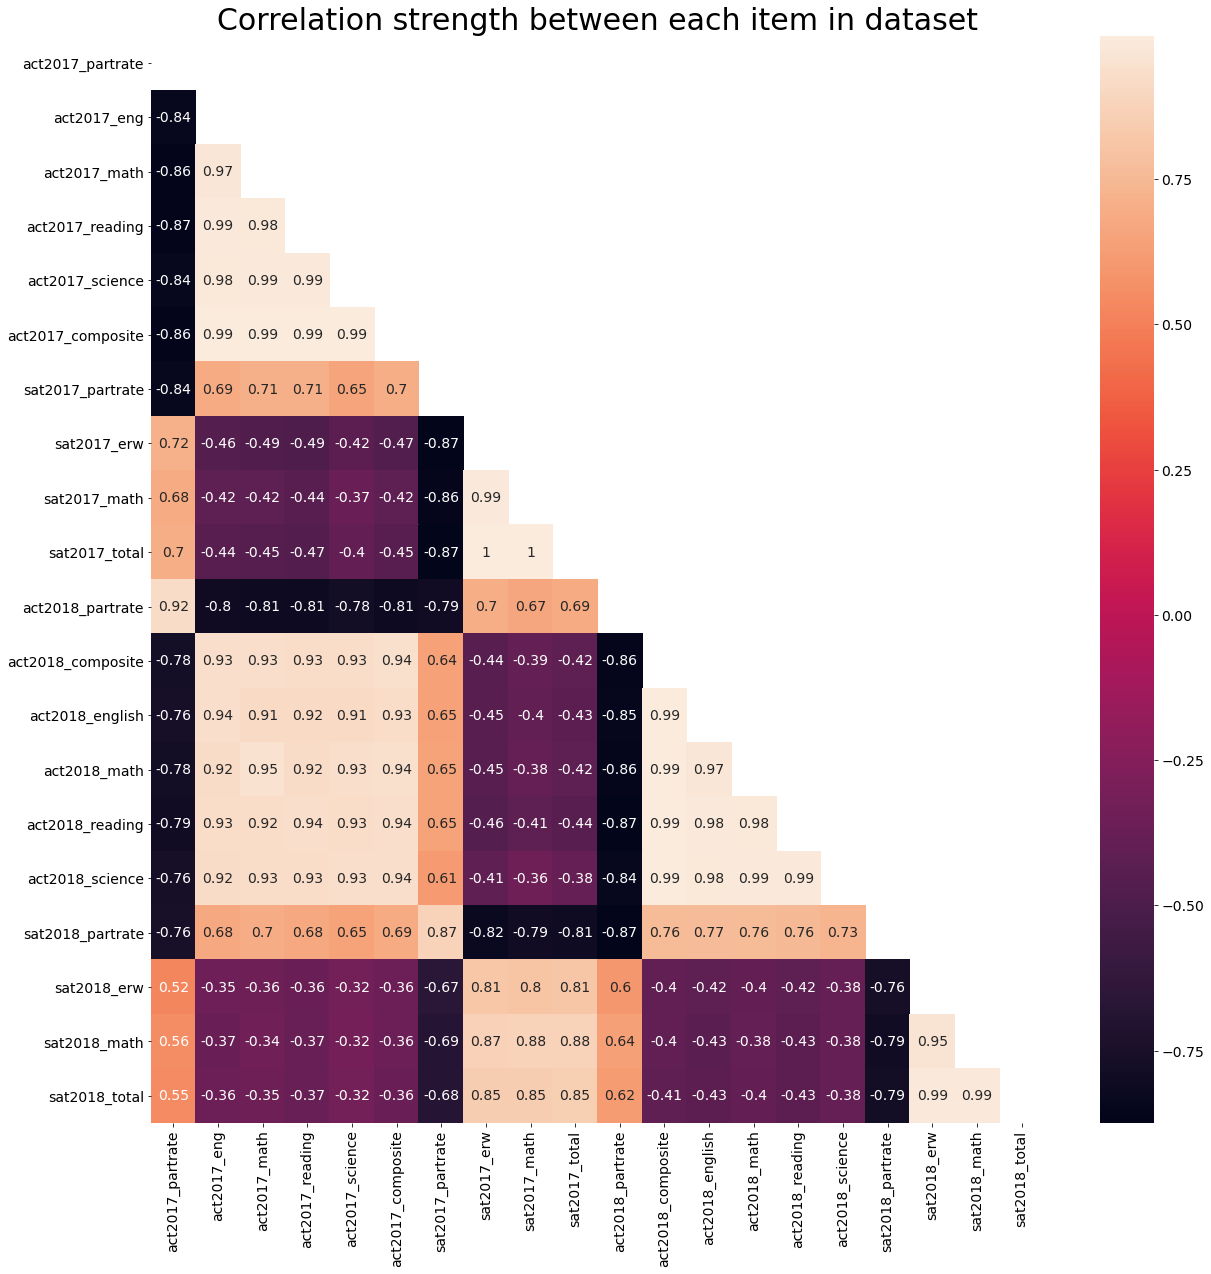

In [75]:
# apply correlation function on final dataframe
final_corr = final.corr()

# set parameters in matplotlib.pyplot
plt.rcParams['font.size'] = 14
plt.figure(figsize = (20,20))

# generate mask
mask = np.zeros_like(final_corr)
mask[np.triu_indices_from(mask)] = True

# generate heatmap
sns.heatmap(final_corr, annot=True, mask = mask).set_title('Correlation strength between each item in dataset', fontsize=30)
plt.show()



**Notably:**

- There is a strong negative correlation of -0.84 between participation rate for ACT and SAT in 2017. This means that when participation rate of ACT increases, it decreases for SAT, vice versa.

- There is a strong negative correlation of -0.87 between participation rate for ACT and SAT in 2018. This means that when participation rate of ACT increases, it decreases for SAT, vice versa.

#### Define a custom function to subplot histograms

In [76]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,15)) # to create specific number of subplots
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists,
                                                 # plots graphs based on number of columns given
        ax[i].hist(x = dataframe[column], bins = 10, histtype = 'bar') # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels)
        ax[i].set_title(list_of_titles[i], fontsize = 20, fontweight = 'bold')


### Math scores for SAT & ACT

#### Plot and interpret histograms 

- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### Participation rates for SAT & ACT

* In 2017, for SAT, the participation rate is low as there are around 20 states that have participation rates of 0% to 20%.
  For ACT, the participation rate is high as there are around 20 states that have participation rates of 80% to 100%
* In 2018, for SAT, the participation rate is low as there are around 20 states that have participation rates of 0% to 20%.
  For ACT, the participation rate is high as there are around 20 states that have participation rates of 80% to 100%.

In [77]:
# data for sat and act 2017 and 2018
data_bar = final[['sat2017_partrate','act2017_partrate',\
        'sat2018_partrate','act2018_partrate']]

In [78]:
# list_of_columns
data_barcol = data_bar.columns

In [79]:
# list_of_titles
bar_title = ['sat 2017 participation','act 2017 participation','sat 2018 participation','act 2018 participation']

In [80]:
# list_of_xlabels
bar_x = 'Participation in (%)'

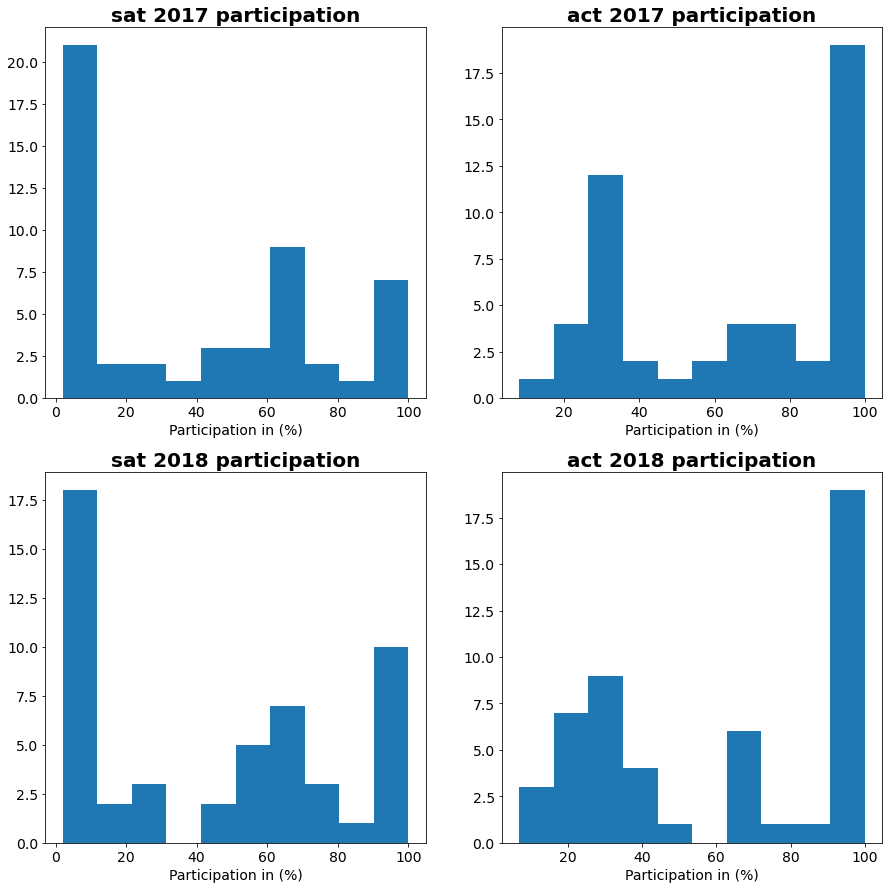

In [81]:
# Participation rates for SAT and ACT 2017 & 2018
subplot_histograms(data_bar, data_barcol, bar_title, bar_x)

### Math Scores for SAT & ACT

* In 2017, for SAT, the math score ranges from 475 to 650. Most of the states scored between 500 to 550, which is considerably good as the maximum score for a subject is 800. For ACT, the math score ranges from 18 to 25. Most of the states scored 19 to 21. This can be considered average as the maximum score for a subject in ACT is 36. The scores are more spreaded out than that of SAT.

* In 2018, for SAT, the math score is between 475 to 650. Most of the states scored between 500 to 550, similar to 2017. For ACT, the math score ranges from 18 to 25. Most of the states scored between 18 to 22, similar to 2017.

In [82]:
# data for math scores for sat and act 2017 and 2018
data_bar = final[['sat2017_math','act2017_math','sat2018_math','act2018_math']]

In [83]:
# list_of_columns
data_barcol = data_bar.columns

In [84]:
# list_of_titles
bar_title = ['sat 2017 math score','act 2017 math score','sat 2018 math score','act 2018 math score']

In [85]:
# list_of_xlabels
bar_x = 'math score'

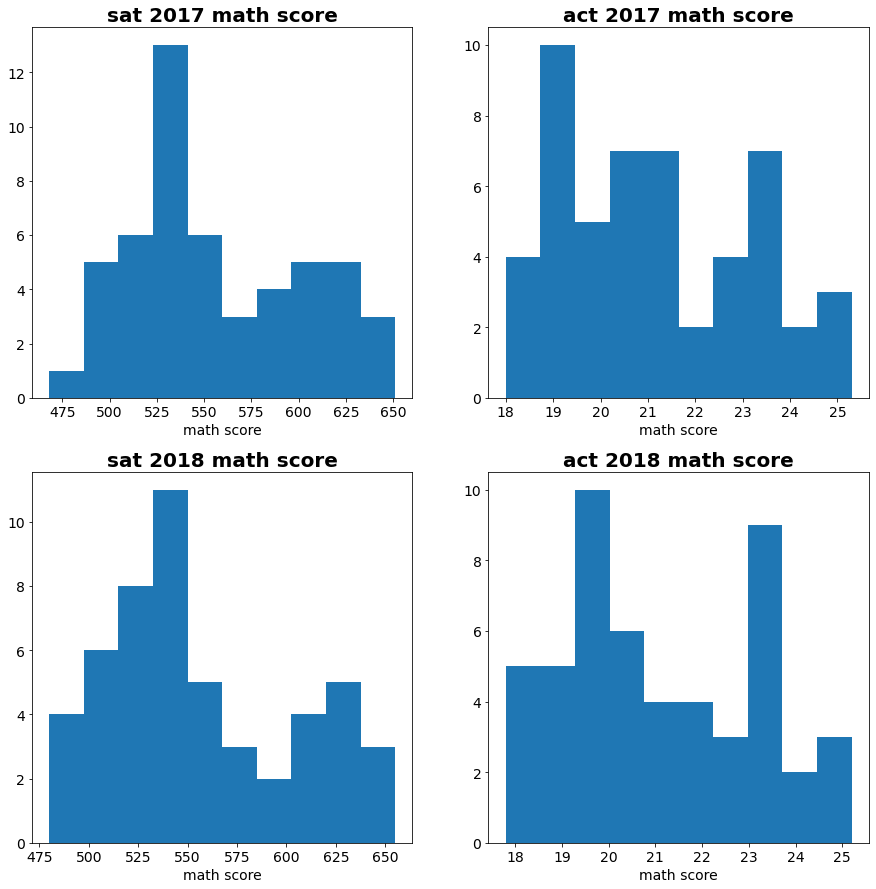

In [86]:
# Participation rates for SAT and ACT 2017 & 2018
subplot_histograms(data_bar, data_barcol, bar_title, bar_x)

### Reading / verbal scores for SAT & ACT

* In 2017, for SAT, the reading score range from 480 to 640. Most of the states scored between 500 to 580, which is considerably good as the maximum score for a subject is 800. Some of the states did better, with scores ranging from 600 to 640. For ACT, the reading score ranges from 18 to 26. Most of the states scored between 20 to 23, this can be considered average as the maximum score for a subject in ACT is 36. Some of the states did better with scores between 23 to 26.

* In 2018, for SAT, the reading score range from 480 to 640. Most of the states scored between 500 to 580. Some of the states have better scores between 600 to 640. For ACT, the reading score ranges from 18 to 26. Most of the states scored between 19 to 21. Some of the states did better with scores between 23 to 26.

In [87]:
# data for math scores for sat and act 2017 and 2018
data_bar = final[['sat2017_erw','act2017_reading','sat2018_erw','act2018_reading']]

In [88]:
# list_of_columns
data_barcol = data_bar.columns

In [89]:
# list_of_titles
bar_title = ['sat2017 erw','act2017 reading','sat2018 erw','act2018 reading']

In [90]:
# list_of_xlabels
bar_x = 'reading scores'

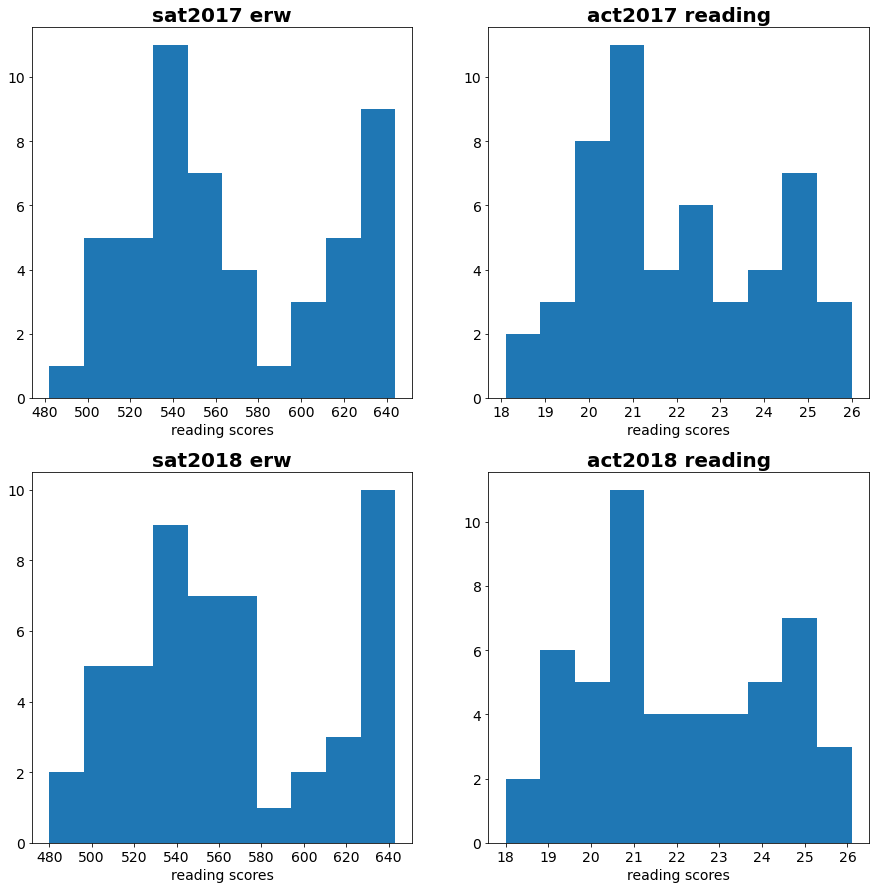

In [91]:
# Participation rates for SAT and ACT 2017 & 2018
subplot_histograms(data_bar, data_barcol, bar_title, bar_x)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018


In [245]:
from sklearn.linear_model import LinearRegression

def subplot_scatter(dataframe,list_of_columns, list_of_titles):
    
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize = (30,50)) 
    ax = ax.ravel() 
    j = 0
    for i in range(0,len(list_of_columns)-1,2):
        
        # using 1 column as x-axis, 1 column as y-axis in designated data 
        ax[j].scatter(x = dataframe.iloc[:,i], y = dataframe.iloc[:,i+1], color = 'blue')
        ax[j].set_xlabel(dataframe.columns[i].replace('_'," "),fontsize = 15, fontweight = 'bold', labelpad = 20)
        ax[j].set_ylabel(dataframe.columns[i+1].replace('_'," "),fontsize = 15, fontweight = 'bold', labelpad = 20)
        ax[j].set_title(list_of_titles[j], fontsize = 25, fontweight = 'bold', color = 'maroon', pad = 20)
        plt.subplots_adjust(hspace=0.3)
        
        # put in the values to generate linear regression model
        # line of best fit already built here
        model = LinearRegression().fit(pd.DataFrame(dataframe.iloc[:,i]), pd.DataFrame(dataframe.iloc[:,i+1]))
        
        # obtain y-hat value, the y value is obtained after substituting in x values into the linear regression model
        # obtained from LinearRegression(). This will be the y value of the linear regression model
        y_hat = model.predict(pd.DataFrame(dataframe.iloc[:,i]))
        
        # x values against y_hat values (predicted from x) used to plot best fit line
        # for each x value, it is plotted against each y_hat value
        # actual values are the blue dots, the blue dots are located far from the plotted line due to error in prediction,
        # given equation for best fit line is y = mx + c + ε, where ε is error
        ax[j].plot(dataframe.iloc[:,i], y_hat, color = 'crimson')
        j += 1
                              

In [246]:
# data to plot scatterplots
data_scatter = final[['act2017_math', 'sat2017_math',
              'act2017_reading', 'sat2017_erw',
              'act2017_composite', 'sat2017_total',
              'sat2017_total','sat2018_total',
              'act2017_composite','act2018_composite']]

In [247]:
# columns of data_scatter
data_scattercols = data_scatter.columns

In [248]:
# list of titles
data_scatter_title = ['score of sat_math against score of act_math 2017',
                'score of sat_read against score of act_read 2017',
                'score of sat_total against score of act_composite 2017',
                'score of sat_total 2018 against score of sat_total 2017',
                'score of act_composite 2018 against act_composite 2017']

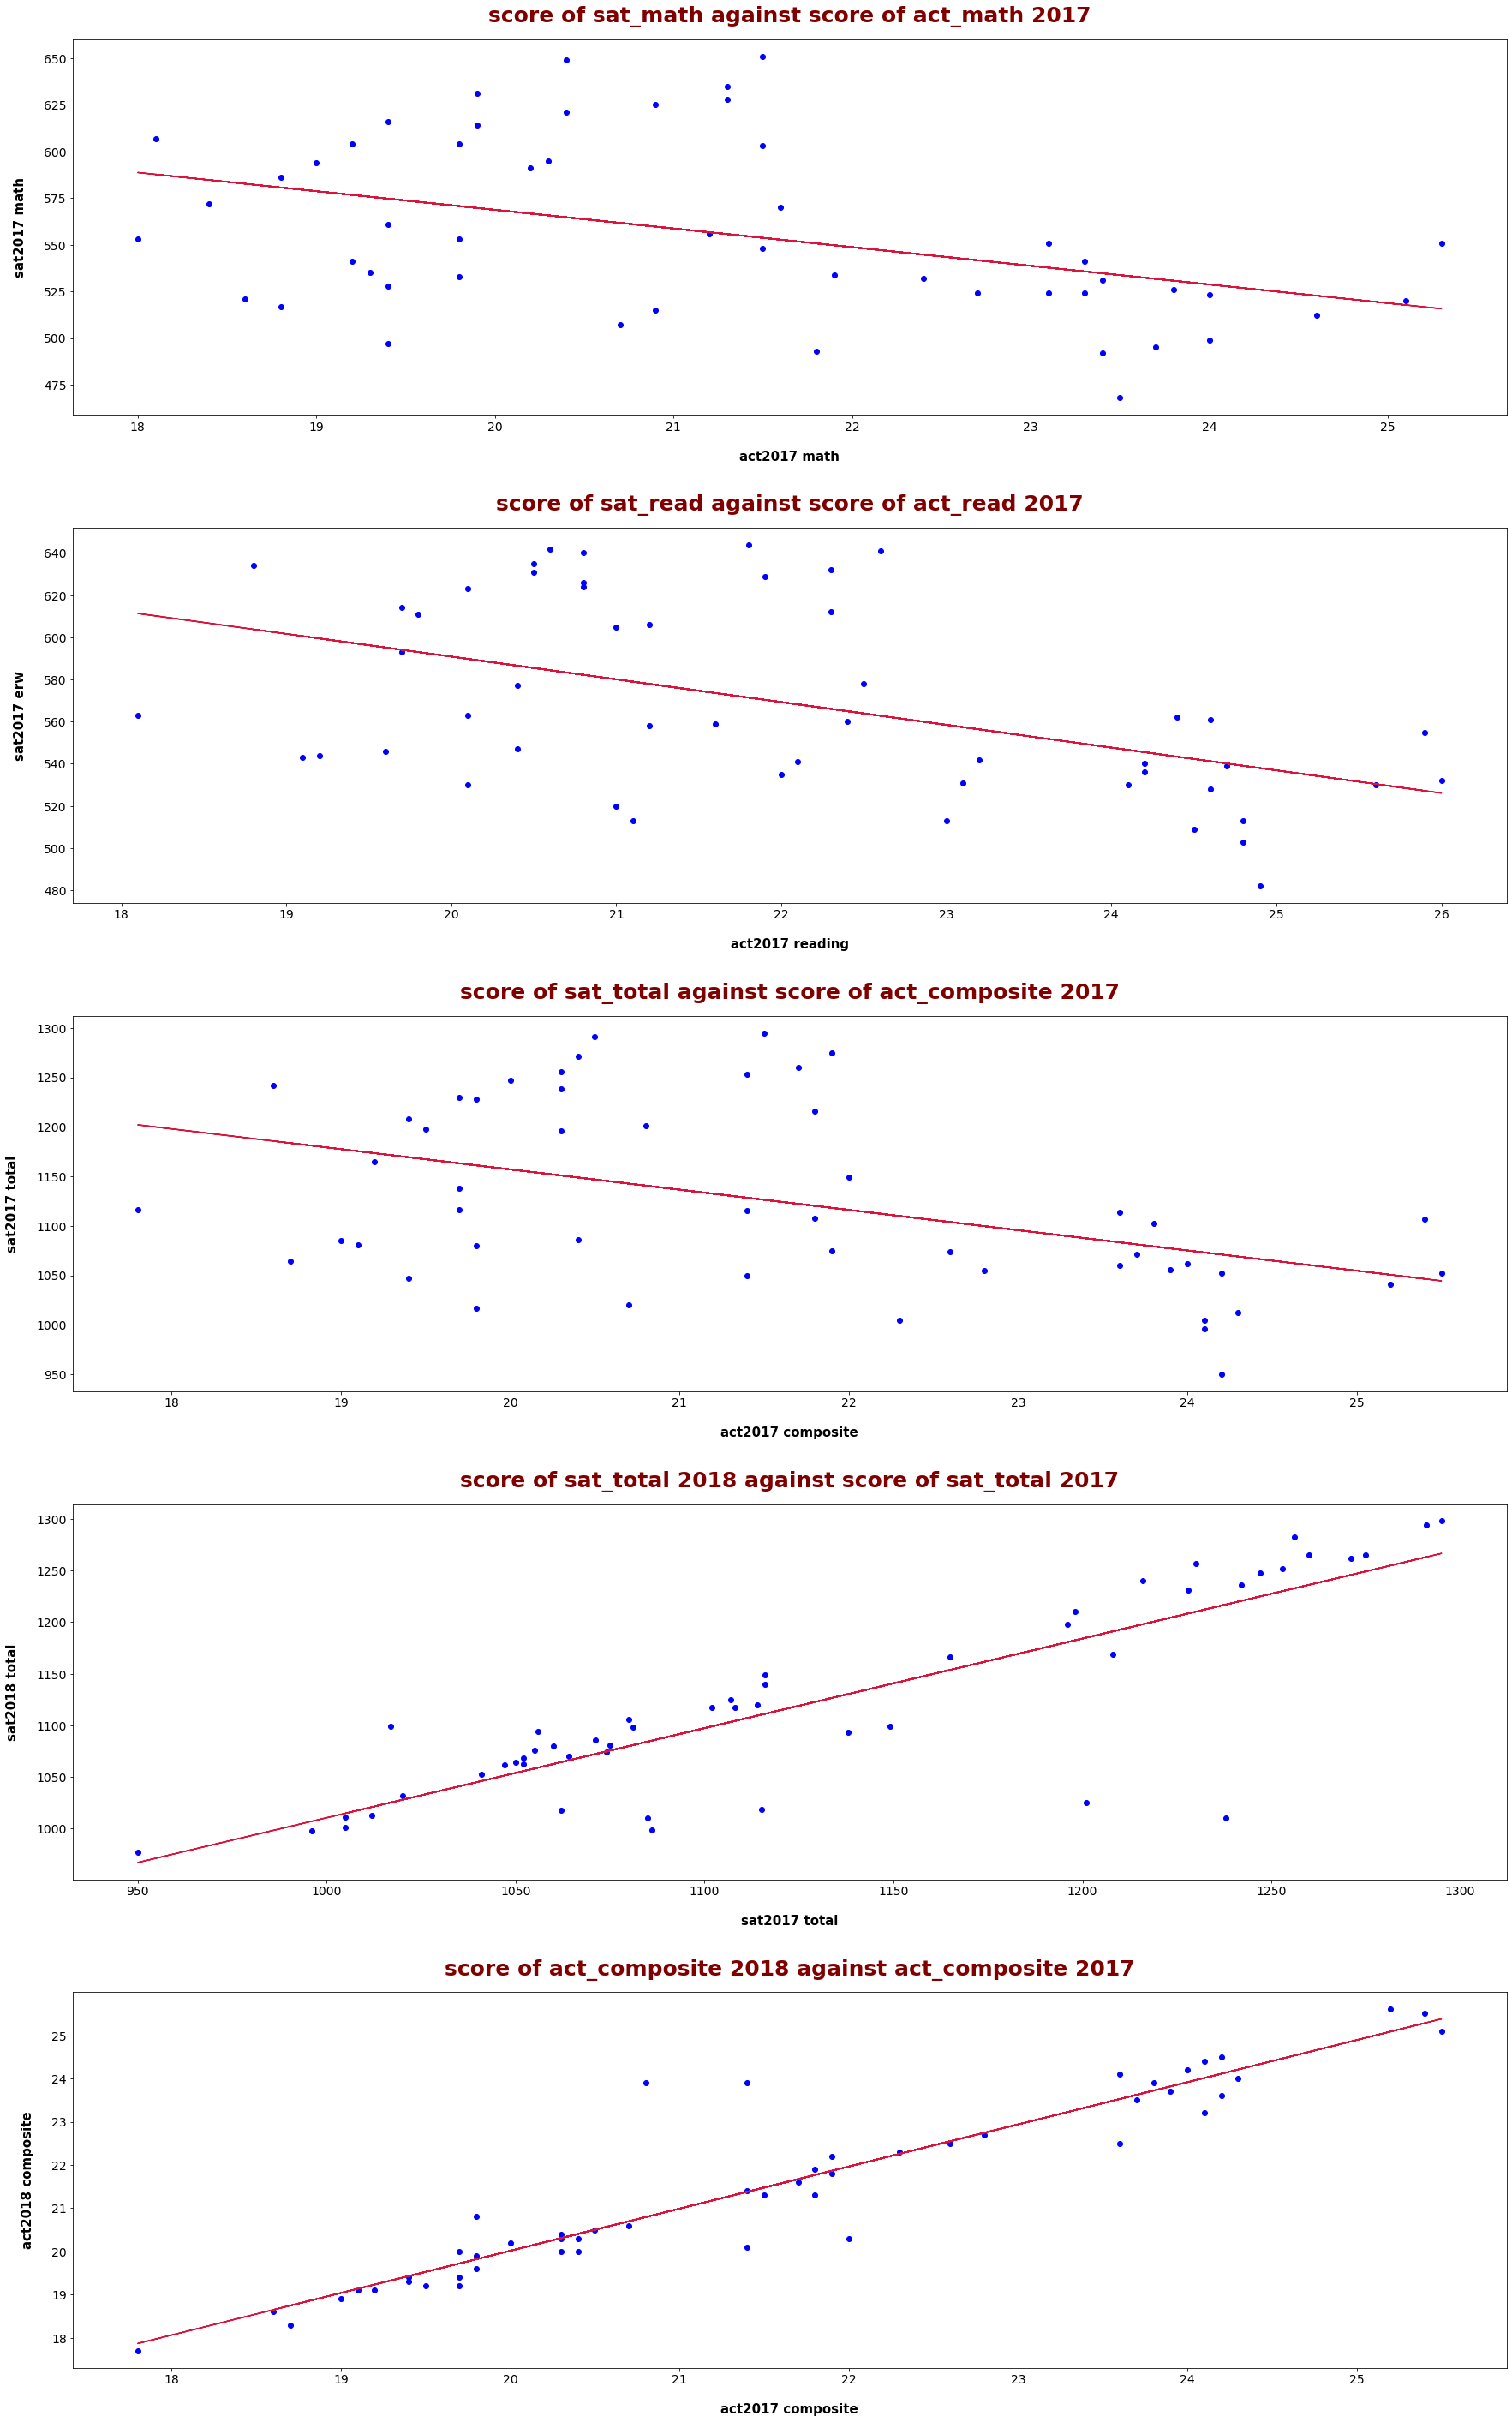

In [249]:
subplot_scatter(data_scatter,data_scattercols,data_scatter_title)

### Scatterplot of score of sat_math 2017 against score of act_math 2017

In [97]:
round(final['act2017_math'].corr(final['sat2017_math']),3)

-0.42

* Correlation strength of sat_math 2017 and act_math 2017 is -0.420. Correlation value above 0.5 is considered high degree of correlation. There is weak correlation between these 2 variables.
* From the scatterplot, it shows weak negative correlation as well, since the datapoints are scattered and located away from line of best fit.

### Scatterplot of score of sat_read 2017 against score of act_read 2017

In [98]:
round(final['sat2017_erw'].corr(final['act2017_reading']),3)

-0.488

* Correlation strength of sat_math 2017 and act_math 2017 is -0.488. Correlation value above 0.5 is considered high degree of correlation. The correlation between these 2 variables is considerably high since it is close to 0.5.

* However, from the scatterplot, it shows weak negative correlation. The datapoints are scattered and located away from line of best fit.

### Scatterplot of score of sat_total 2017 against score of act_composite 2017

In [99]:
round(final['sat2017_total'].corr(final['act2017_composite']),3)

-0.449

* Correlation strength of sat_math 2017 and act_math 2017 is -0.449. Correlation value above 0.5 is considered high degree of correlation.

* From the scatterplot, it shows weak negative correlation. The datapoints are scattered and located away from line of best fit.

### Scatterplot of score of sat_total 2018 against score of sat_total 2017

In [100]:
round(final['sat2018_total'].corr(final['sat2017_total']),3)

0.853

* Correlation strength of sat_math 2017 and act_math 2017 is 0.853. Correlation value above 0.5 is considered high degree of correlation.

* From the scatterplot, it shows considerable positive linear correlation. The datapoints are quite close to the line of best fit, with some datapoints located away from line of best fit.

* This shows that when there is an increase in total SAT score in 2017, there should be an increase in total SAT score for 2018. However, it is to be noted that the cause for this increase is not explained by correlation.

### Scatterplot of score of act_composite 2018 against score of act_composite 2017

In [101]:
round(final['act2018_composite'].corr(final['act2017_composite']),3)

0.939

* Correlation strength of sat_math 2017 and act_math 2017 is 0.939. Correlation value above 0.5 is considered high degree of correlation.

* From the scatterplot, it shows considerable positive linear correlation. The datapoints are quite close to the line of best fit, with some datapoints located away from line of best fit.

* This shows that when there is an increase in composite ACT score in 2017, there should be an increase in composite ACT score for 2018. However, it is to be noted that the cause for this increase is not explained by correlation.

### Conclusion from the scatter plots: 

a. Total SAT score and composite ACT score in 2017 have weak negative correlation.

b. Total SAT score for 2017 and 2018 have high degree of positive correlation. 

c. Composite ACT score for 2017 and 2018 have high degree of positive correlation.


#### Plot and interpret boxplots

In [102]:
def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,60))
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(data = dataframe[column], ax= ax[i])
        ax[i].set_title(column, fontsize = 15, fontweight = 'bold', pad = 15)
        ax[i].set_xticks(ticks = [])
        plt.subplots_adjust(hspace=0.3)


In [103]:
# dataset for boxplot
data_boxplot = final.iloc[:,1:]

In [104]:
# col names
data_boxplotcols = data_boxplot.columns

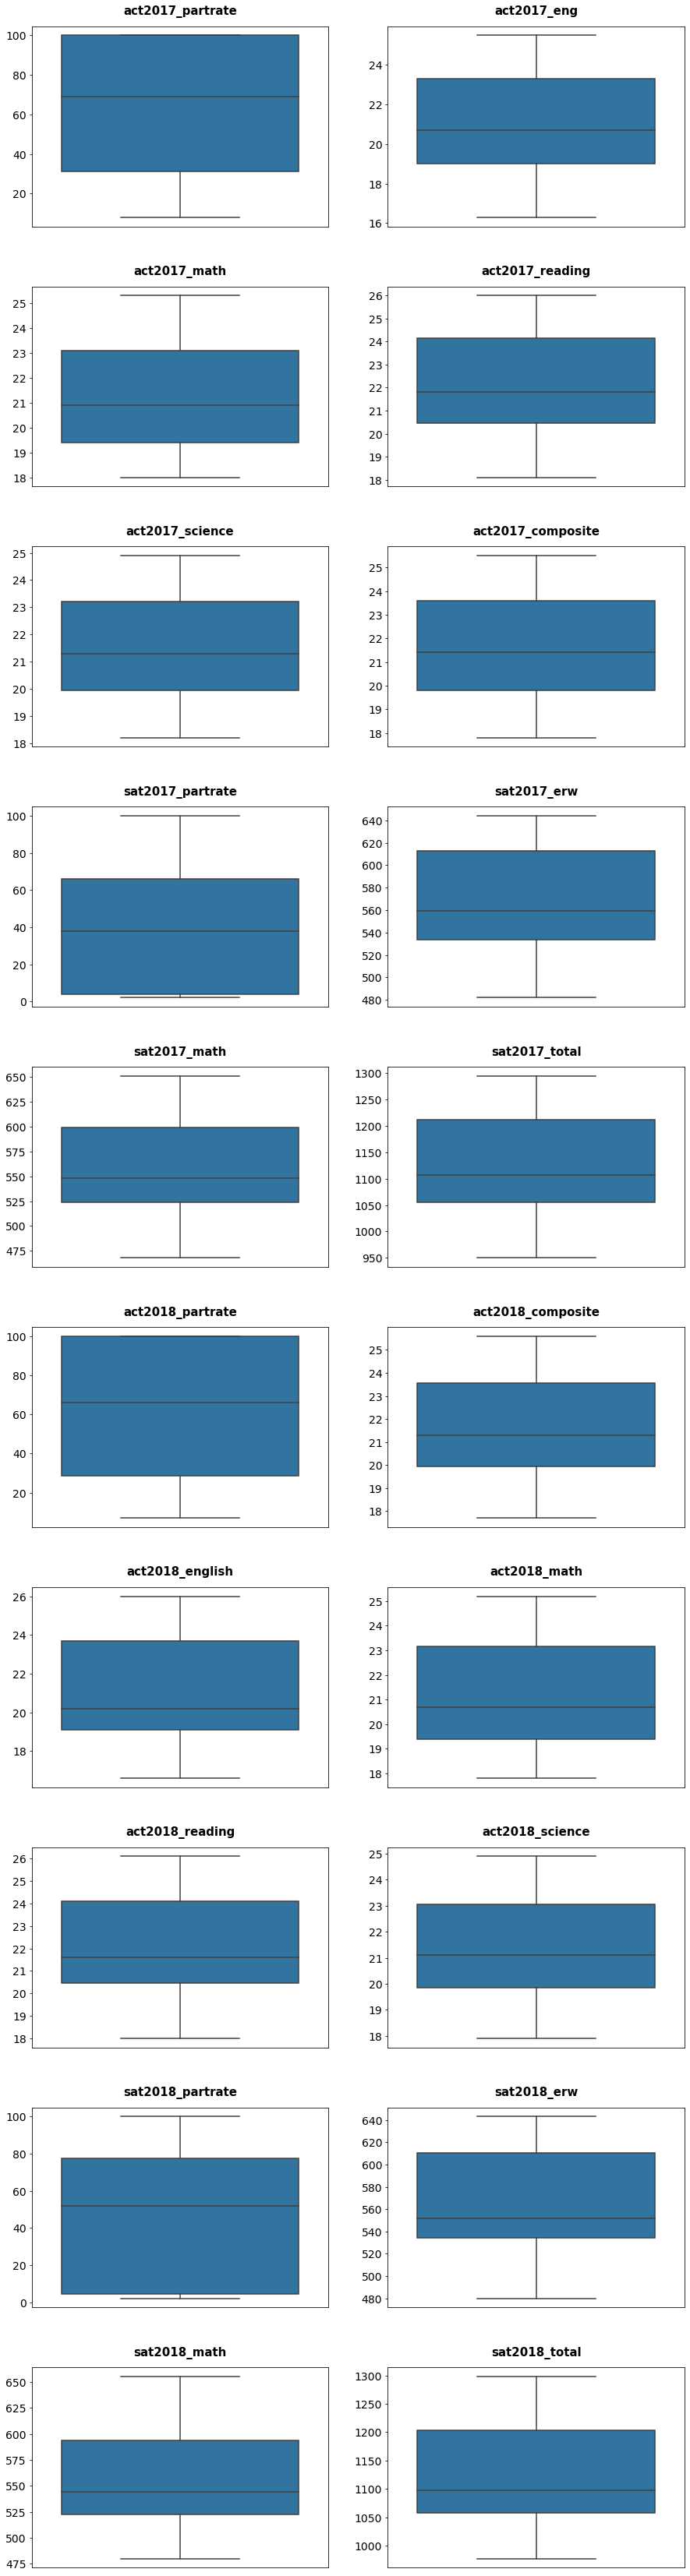

In [105]:
subplot_boxplot(data_boxplot, data_boxplotcols)

##### Summary of participation rates for SAT and ACT in 2017 & 2018

In [106]:
final[['act2017_partrate','act2018_partrate','sat2017_partrate','sat2018_partrate']].describe()

,act2017_partrate,act2018_partrate,sat2017_partrate,sat2018_partrate
count,51.000000,51.000000,51.000000,51.000000
mean,65.254902,61.647059,39.803922,45.745098
std,32.140842,34.080976,35.276632,37.314256
min,8.000000,7.000000,2.000000,2.000000
25%,31.000000,28.500000,4.000000,4.500000
50%,69.000000,66.000000,38.000000,52.000000
75%,100.000000,100.000000,66.000000,77.500000
max,100.000000,100.000000,100.000000,100.000000


##### Summary of  composite and total scores of SAT and ACT in 2017 & 2018

In [107]:
final[['act2017_composite','act2018_composite','sat2017_total','sat2018_total']].describe()

,act2017_composite,act2018_composite,sat2017_total,sat2018_total
count,51.000000,51.000000,51.000000,51.000000
mean,21.509804,21.486275,1126.098039,1120.019608
std,2.028424,2.106278,92.494812,94.155083
min,17.800000,17.700000,950.000000,977.000000
25%,19.800000,19.950000,1055.500000,1057.500000
50%,21.400000,21.300000,1107.000000,1098.000000
75%,23.600000,23.550000,1212.000000,1204.000000
max,25.500000,25.600000,1295.000000,1298.000000


## Observations from boxplot

#### 1) participation rates of SAT and ACT in 2017 & 2018
Referring to the summary of participation rates also, the participation rate of ACT is higher than SAT in 2017 and 2018. It can be seen at the 75th percentile, the participation rate of ACT is 100% for both years. The participation rate of SAT is 66% in 2017 and 77.5% in 2018. This shows that students prefer to take ACT over SAT. Additionally, the mean participation rate of ACT is higher than that of SAT for both 2017 and 2018.

#### 2) composite and total scores of SAT and ACT in 2017 & 2018
Referring to the summary of scores also, the mean of composite scores is around 21.5 in ACT 2017 and 2018. The mean of total scores is 1126 and 1120 in SAT 2017 and 2018 respectively. For ACT ( (21.5/36) * 100), it is 58.3% against the total of 36. For SAT ( (1126+1120/1600) * 100), it is 70.2% against the total of 1600.
In terms of percentage, students generally score better in SAT than ACT. However, participation of ACT is still higher than SAT.

## Descriptive and Inferential Statistics

### Summary of final data

In [110]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act2017_partrate,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act2017_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act2017_science,51.0,21.462745,1.753392,18.2,19.95,21.3,23.20,24.9
act2017_composite,51.0,21.509804,2.028424,17.8,19.80,21.4,23.60,25.5
sat2017_partrate,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat2017_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


Mean: It is the average of the variable. For the SAT or ACT scores, it is the mean score of the subject in each state. The mean in the description table here does not sense, as it is the average of means. For participation rate, it is the mean participation rate for all the 51 states. 

Std: It is the standard deviation. It shows how much the variable value varies from the mean. For participation rate, it shows how much the participation rates varies from the mean in the 51 states.

min: Minimum value of the variable.

25%: 25th percentile. It shows what is the score at the 25th percentile in the subject. For example, for act 2017
English score, 25% of the students scored 19 points.

50%: 50th percentile. It shows what is the score at the 50th percentile in the subject. For example, for act 2017
English score, 50% of the students scored 20.7 points.

75%: 75th percentile. It shows what is the score at the 75th percentile in the subject. For example, for act 2017
English score, 75% of the students scored 23.3 points.

max: Maximum value of the variable.

## Plot the graphs for each datasets to see the distributions

In [300]:
def subplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,60)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
                                                 
        ax[i].set_ylabel('Frequency', fontsize = 15, fontweight = 'bold', labelpad = 10)
        ax[i].set_title(column, fontsize = 20, fontweight = 'bold', pad = 20)
        plt.subplots_adjust(hspace=0.3, wspace = 0.3)
        sns.distplot(dataframe[column], bins=50, kde=True, color = 'blue', ax = ax[i]).set(xlabel=None)

In [301]:
data = final[['act2017_math','act2018_math',
             'sat2017_math', 'sat2018_math',
             'act2017_reading', 'act2018_reading',
             'sat2017_erw','sat2018_erw',
             'act2017_partrate', 'act2018_partrate',
             'sat2017_partrate', 'sat2018_partrate']]

list_col = data.columns


In [302]:
final.columns

Index(['state', 'act2017_partrate', 'act2017_eng', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite',
       'sat2017_partrate', 'sat2017_erw', 'sat2017_math', 'sat2017_total',
       'act2018_partrate', 'act2018_composite', 'act2018_english',
       'act2018_math', 'act2018_reading', 'act2018_science',
       'sat2018_partrate', 'sat2018_erw', 'sat2018_math', 'sat2018_total'],
      dtype='object')

## Graphs to see distributions

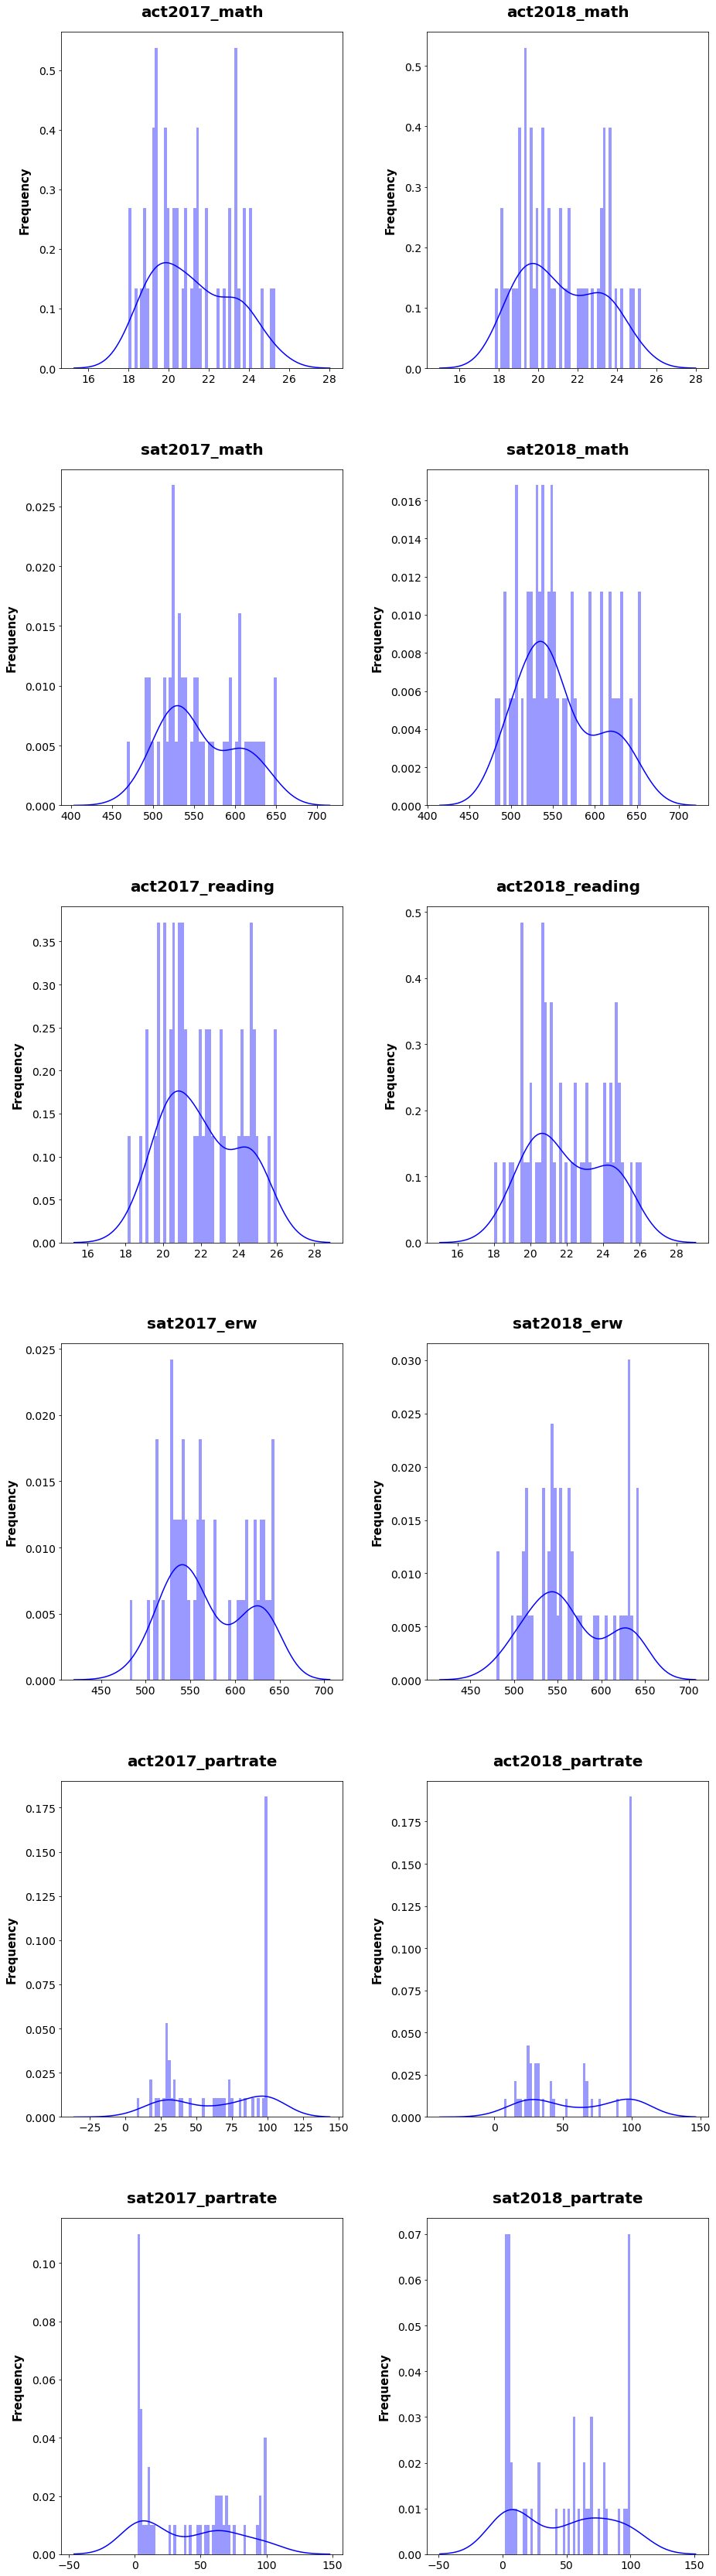

In [303]:
import warnings; warnings.simplefilter('ignore')

subplot(data, list_col)

***According to Central Limit Theorem (CLT), we generally assuming that data we sample from a population will be normally distributed.***
* However, the SAT or ACT score for each state is a mean score. The data given is already population of means. The sample size is not known for each state and they are likely to be different. From the graphs above, the data is not normally distributed. Based on the graphs plotted, the distribution is bimodal.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

We cannot do statistical inference because only mean is known, the variance and standard deviation is not known. Also, when the graphs are plotted, the distribution for the population of means is not normally distributed. The distribution is bimodal.

* CLT is only fulfilled when you plot a population of means with **random** sampling.
* We only know the mean scores from each state. 
* To do random sampling, we will need to randomly sample from the national population and not specifically from each state.
* We will have to randomly sample from all the students that took part in SAT or ACT on the national level.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

No, it will be inappropriate. Based on the scatterplot for score of sat_math 2017 against score of act_math 2017, which has a weak negative correlation, it suggests that when the SAT math score is high, the ACT math score will lower.

Also, the SAT and ACT scores are on a different scale. They are also different tests. With these differences it will be biased to use this as a basis for comparison.

## Further Research

#### States that have low participation on both tests either year

We will be looking at 3 states that have low SAT participation rates in 2017 and 2018.

**Iowa, Mississippi and North Dakota**


**Participation for the 3 states for SAT in 2017 and 2018**

In [307]:
final[(final["sat2017_partrate"]== final.sat2017_partrate.min()) |\
     (final["sat2018_partrate"]== final.sat2018_partrate.min())][["sat2017_partrate","sat2018_partrate", "state"]]

,sat2017_partrate,sat2018_partrate,state
15,2.0,3.0,Iowa
24,2.0,3.0,Mississippi
34,2.0,2.0,North Dakota


### Based on the records above:

* The SAT participation rates for Iowa, Mississippi and North Dakota are the lowest. For Iowa and Mississippi, the participation rates only increased by 1% from 2017 to 2018.

Possible reasons are:

**1. State is the stronghold of ACT.**


- Using Iowa as example, it could be the stronghold of ACT. ACT originated from Iowa hence it could be the reason why it is strongly established in Iowa and the participation rate is low.

https://www.forbes.com/sites/susanadams/2020/09/30/the-forbes-investigation-how-the-sat-failed-america/?sh=580c78ac53b5

**2. States that have low SAT/ACT participation rates have the tendency or practice to send their best students to take SAT/ACT and have the highest scores.**


https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate

- From the link above, it is observed that states that have low SAT/ACT participation rates have the tendency to send their best students to take the SAT exams and have the highest scores.


- Based on the article below:

https://blog.prepscholar.com/average-sat-scores-by-state-most-recent

The states that have low participation rates have higher SAT scores compared to the other states as below (extracted from website).

|State|Participation Rate|ERW|Math|Total|
|---|---|---|---|---|
|Alabama|	 7%| 576|	551|	1127|
|Arkansas|   4%	|590|	567|	1157|
|Iowa|	     3%	|611|	609|	1220|
|Kansas|	 4%	|617|	620|	1237|
|Kentucky|	4%	|609|	598|	1207|
|Louisiana|	5%	|597|	573|	1170|
|Minnesota|	4%	|624|	633|	1257|
|Mississippi|3%| 610|	593|	1203|
|Missouri|	4%	|610|	603|	1212|
|Nebraska|	3%	|615|	614|	1229|
|North Dakota|2%|615|	617|	1231|
|South Dakota|3%|609|	610|	1218|
|Tennessee|	7%	|601|	585|	1186|
|Wisconsin|	3%	|615|	628|    1243|
|Wyoming|	2%	|614|	606|	1220|


In [116]:
# Average score SAT total score for the states above:
average_total = (1127 + 1157 + 1220 + 1237 + 1207 + 1170 + 1257 + 1203 + 1212 + 1229 + 1231 + 1218 + 1186 + 1243 + 1220)/15
(average_total/1600)*100

75.4875

* The mean SAT total score for the states above is 75.5% against total of 1600.

* We look at the same states in our dataset.


SAT statistics for the same states as above for math and reading in 2017 and 2018 in dataset.

In [117]:
final[final["state"].isin(['Alabama','Arkansas','Iowa','Kansas','Kentucky','Louisiana','Minnesota','Mississippi',
                         'Missouri','Nebraska','North Dakota','South Dakota','Tennessee','Wisconsin','Wyoming'])]\
                         [["sat2017_partrate","sat2018_partrate","sat2017_erw","sat2018_erw","sat2017_math","sat2018_math","sat2017_total","sat2018_total","state"]]\
                        .sort_values(by = "state",ascending = True)

,sat2017_partrate,sat2018_partrate,sat2017_erw,sat2018_erw,sat2017_math,sat2018_math,sat2017_total,sat2018_total,state
0,5.0,6.0,593,595,572,571,1165,1166,Alabama
3,3.0,5.0,614,592,594,576,1208,1169,Arkansas
15,2.0,3.0,641,634,635,631,1275,1265,Iowa
16,4.0,4.0,632,633,628,631,1260,1265,Kansas
17,4.0,4.0,631,630,616,618,1247,1248,Kentucky
18,4.0,4.0,611,615,586,595,1198,1210,Louisiana
23,3.0,4.0,644,643,651,655,1295,1298,Minnesota
24,2.0,3.0,634,630,607,606,1242,1236,Mississippi
25,3.0,4.0,640,633,631,629,1271,1262,Missouri
27,3.0,3.0,629,629,625,623,1253,1252,Nebraska


In [118]:
final[["sat2017_total","sat2018_total"]].mean()

sat2017_total    1126.098039
sat2018_total    1120.019608
dtype: float64

* Mean score is around 70% against total ((1120+1126)/2) / 1600

* This coincides with the data taken from the website.

SAT scores for states with high participation in dataset for SAT 2017 and 2018.

In [119]:
final[(final["sat2017_partrate"] > 90) & (final["sat2018_partrate"] > 90)]\
                         [["sat2017_partrate","sat2018_partrate","sat2017_erw","sat2018_erw","sat2017_math","sat2018_math","sat2017_total","sat2018_total","state"]]\
                        .sort_values(by = "state",ascending = True)

,sat2017_partrate,sat2018_partrate,sat2017_erw,sat2018_erw,sat2017_math,sat2018_math,sat2017_total,sat2018_total,state
6,100.0,100.0,530,535,512,519,1041,1053,Connecticut
7,100.0,100.0,503,505,492,492,996,998,Delaware
8,100.0,92.0,482,497,468,480,950,977,District of Columbia
12,93.0,100.0,513,508,493,493,1005,1001,Idaho
19,95.0,99.0,513,512,499,501,1012,1013,Maine
22,100.0,100.0,509,511,495,499,1005,1011,Michigan
29,96.0,96.0,532,535,520,528,1052,1063,New Hampshire


* From the table above, when SAT participation rate is high, the total score is lower.

In [120]:
final[(final["sat2017_partrate"] > 90) & (final["sat2018_partrate"] > 90)]\
                         [["sat2017_partrate","sat2018_partrate","sat2017_erw","sat2018_erw","sat2017_math","sat2018_math","sat2017_total","sat2018_total","state"]]\
                        .sort_values(by = "state",ascending = True).mean()

sat2017_partrate      97.714286
sat2018_partrate      98.142857
sat2017_erw          511.714286
sat2018_erw          514.714286
sat2017_math         497.000000
sat2018_math         501.714286
sat2017_total       1008.714286
sat2018_total       1016.571429
dtype: float64

* The mean score of these states is lower than the states above 63.2% against total of 1600. ((1008+1016)/2) / 1600
* This shows that states with low participation rates have higher SAT scores than states with high participation rates.

### We plot the graphs to show the relationship between SAT / ACT scores and participation rates.

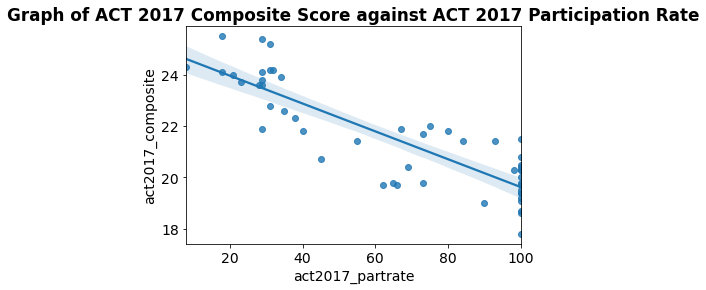

In [121]:
plt.title("Graph of ACT 2017 Composite Score against ACT 2017 Participation Rate", fontweight = 'bold')
sns.regplot(x = final["act2017_partrate"], y = final["act2017_composite"]);

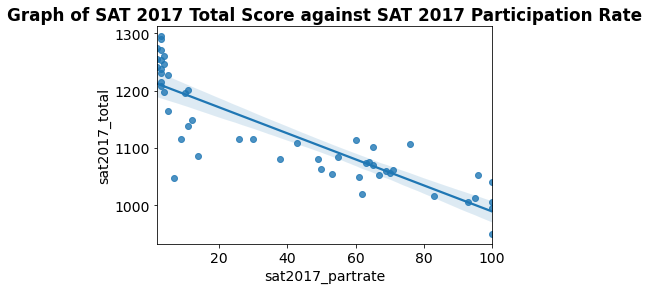

In [122]:
plt.title("Graph of SAT 2017 Total Score against SAT 2017 Participation Rate", fontweight = 'bold')
sns.regplot(x = final["sat2017_partrate"], y = final["sat2017_total"]);

### In our dataset, for both SAT and ACT, when participation rate is low, the score is high. When participation rate is high, the score is low.
* This fits the trend mentioned in the website previously.


https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate

## Conclusions and Recommendations

**Key findings:**
1. ACT participation rate is higher than SAT participation rate for 2017 and 2018.
2. For states with low SAT participation rate, the SAT score is higher.
3. When SAT participation rate increases, the SAT score drops. It is the same for ACT.

**Possible Reasons for lower overall ACT/SAT participation rates**
- It could be due to the schools having the practice of sending their best students to take the ACT/SAT.

- However, the overall participation rate of ACT is still higher than SAT. Schools will want their students to succeed in the exams so that they can enter university. This suggests the SAT is more difficult to score than ACT. Hence, more states send their better students to take SAT compared to ACT.

**Recommendation**
- College Board may wish to give sample test papers to universities to get feedback and improve their tests so that it matches the standard of ACT.

**For Iowa**
- College Board may want to approach arts college and emphasize on the benefits of SAT on how it can help them assess students using only the ERW portion of SAT.

https://osau.com/explore-experience/108/10-colleges-that-dont-require-the-sat

**Additional Data required**
- College Board may wish to get the feedback from teachers and students from the schools. From there, further analysis can be done to look at the trend for the schools' sentiments towards SAT.

# Footnotes:

#### Definition of SAT taken from https://en.wikipedia.org/wiki/SAT
The SAT is a standardized test widely used for college admissions in the United States. It was debuted by the College Board in 1926, its name and scoring have changed several times; originally called the Scholastic Aptitude Test, it was later called the Scholastic Assessment Test, then the SAT I: Reasoning Test, then the SAT Reasoning Test, then simply the SAT.

The SAT is wholly owned, developed, and published by the College Board, a private, not-for-profit organization in the United States. The test is intended to assess students' readiness for college. The SAT was originally designed not to be aligned with high school curricula, but several adjustments were made for the version of the SAT introduced in 2016, and College Board president, David Coleman, has said that he also wanted to make the test reflect more closely what students learn in high school.

Scores on the SAT range from 400 to 1600, combining test results from two 200-to-800-point sections: Mathematics, and Critical Reading and Writing.

#### Definition of ACT taken from https://en.wikipedia.org/wiki/ACT_(test)
The ACT is originally an abbreviation of American College Testing). It is a standardized test used for college admissions in the United States. It is currently administered by ACT, a nonprofit organization of the same name. The ACT test covers four academic skill areas: English, mathematics, reading, and science reasoning. It also offers an optional direct writing test. It is accepted by all four-year colleges and universities in the United States as well as more than 225 universities outside of the U.S.

The main four ACT test sections are individually scored on a scale of 1–36, and a composite score (the rounded whole number average of the four sections) is provided.

#### act_2017 database
The total score for each subject is 1 to 36. The database contains the ACT scores for the 4 subjects across the States listed in USA in 2017.  The participation rate and average ACT score in each State and are recorded also. The national ACT scores for English, Math, Reading and Science, the average ACT score, and the national participation rate are recorded as well.

#### sat_2017 database
The total score for each is 200 to 800 points. The database contains the SAT scores for Evidence-Based Reading (ERW) and Math. It also contains the participation rate from each State and the total SAT score.


